<a href="https://colab.research.google.com/github/linashmyak/MLL/blob/main/ML5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
CS_data = pd.read_csv('Customer_support_data.csv')
T_data = pd.read_csv('titanic.csv')

In [ ]:
CS_data.describe(include="all")

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,09/08/2023 11:55,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


In [ ]:
T_data.describe(exclude=[np.number])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


<Axes: xlabel='channel_name', ylabel='Count'>

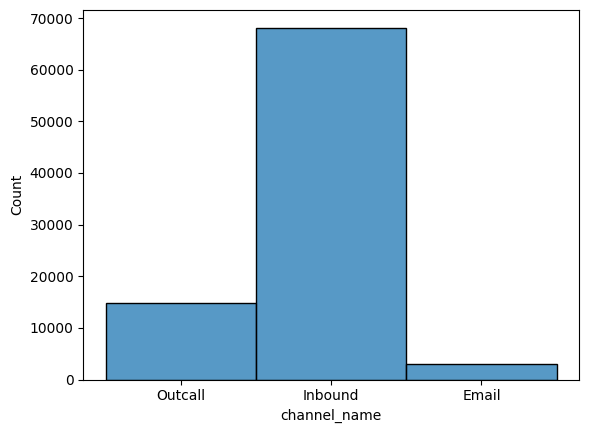

In [ ]:
sns.histplot(data=CS_data, x="channel_name")

In [ ]:
CS_data.channel_name.value_counts()

,count
channel_name,
Inbound,68142
Outcall,14742
Email,3023


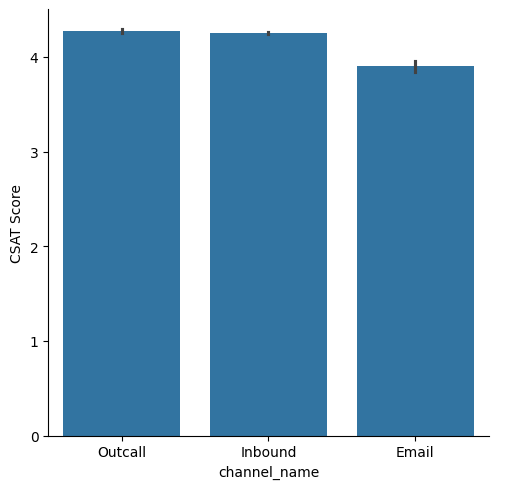

In [ ]:
sns.catplot(data=CS_data, x="channel_name", y="CSAT Score", kind="bar")

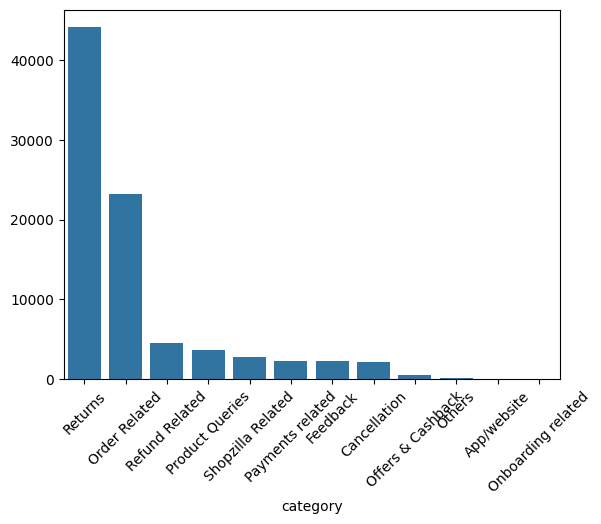

In [ ]:
counts = CS_data.category.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

In [ ]:
CS_data["Customer Remarks New"] = (CS_data["Customer Remarks"].str.len() > 3).astype(int)

In [ ]:
CS_data["Is_order"] = (CS_data["Order_id"].isna()).astype(int)

In [ ]:
CS_data.loc[~CS_data["Sub-category"].isin([
    "Reverse Pickup Enquiry", "Return request", "Delayed", "Order status enquiry",
    "Installation/demo", "Fraudulent User", "Product Specific Information"
    ]), "Sub-category"] = "Other"

In [ ]:
CS_data.groupby(["Agent_name"]).agg({'Agent_name': 'count'})

,Agent_name
Agent_name,
Aaron Edwards,93
Aaron Romero,59
Abigail Gonzalez,25
Adam Barnett,56
Adam Hammond,60
...,...
Yesenia Bowers,50
Zachary Collins,75
Zachary Ford,62


In [ ]:
CS_data['Agent_count'] = CS_data.groupby(["Agent_name"])["Agent_name"].transform('count')

In [ ]:
CS_data.groupby(["Supervisor"]).agg({'Agent_name': 'nunique'})

,Agent_name
Supervisor,
Abigail Suzuki,38
Aiden Patel,41
Alexander Tanaka,15
Amelia Tanaka,19
Austin Johnson,29
Ava Wong,70
Brayden Wong,45
Carter Park,64
Charlotte Suzuki,22


In [ ]:
CS_data['Sups_no_agents'] = CS_data.groupby(["Supervisor"])["Agent_name"].transform('nunique')

In [ ]:
CS_data['Product_category'] = CS_data['Product_category'].fillna('unknown')

In [ ]:
CS_data['connected_handling_time'] = CS_data['connected_handling_time'].fillna('0')

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE_sex = LabelEncoder()
T_data.Sex = LE_sex.fit_transform(T_data.Sex)

In [ ]:
T_data.Pclass.replace({
    'first': 1, 'second': 2, 'third': 3
}, inplace=True)

<ipython-input-24-7e2a4c6e8954>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  T_data.Pclass.replace({


In [ ]:
from sklearn.preprocessing import OneHotEncoder
OH_embarked = OneHotEncoder(sparse_output=False)
OH_embarked.fit_transform(T_data[['Embarked']])

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
OH_embarked.get_feature_names_out(['Embarked'])

array(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan'],
      dtype=object)

In [ ]:
dummies = pd.DataFrame(OH_embarked.fit_transform(T_data[['Embarked']]),
                       columns=OH_embarked.get_feature_names_out(['Embarked']),
                       index = T_data.index)
dummies

,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
886,0.0,0.0,1.0,0.0
887,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0


In [ ]:
T_dummies = pd.concat([T_data, dummies]).drop(["Embarked"], axis=1)

In [ ]:
CS_dropped = CS_data.drop([
    "Unique id",
    "Sub-category",
    "Customer Remarks",
    "Customer_City",
    "Agent_name",
    "Supervisor",
    "Order_id",
    "order_date_time",
    "Issue_reported at",
    "issue_responded",
    "Survey_response_Date",
    "Item_price",

], axis=1)

In [ ]:
CS_dummies = pd.get_dummies(CS_dropped)
CS_dummies

,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents,channel_name_Email,channel_name_Inbound,channel_name_Outcall,category_App/website,category_Cancellation,...,Tenure Bucket_0-30,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Agent Shift_Afternoon,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split
0,5,0,0,42,41,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
1,5,0,0,32,17,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2,5,0,0,35,46,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
3,5,0,0,48,28,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,5,0,0,124,29,False,True,False,False,True,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,4,0,0,128,31,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
85903,5,1,0,75,50,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
85904,5,1,0,31,41,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
85905,4,0,0,48,44,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False


**Самостоятельные задания**

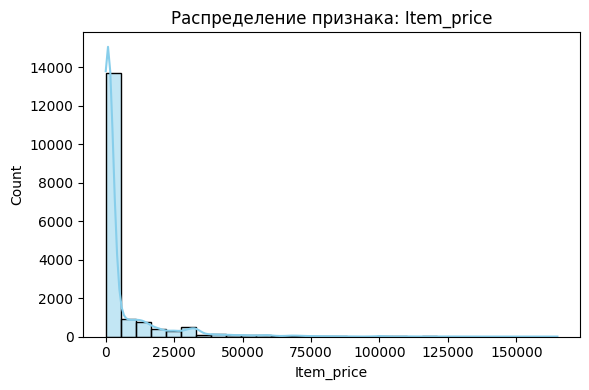

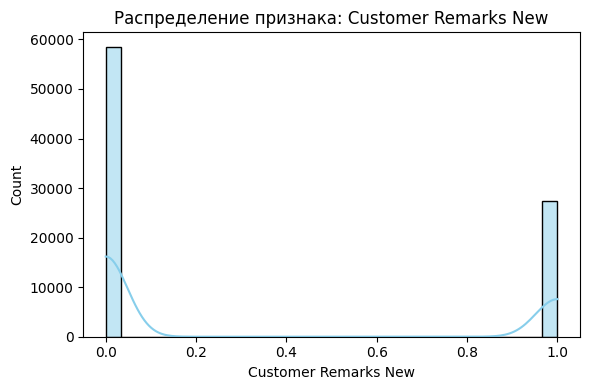

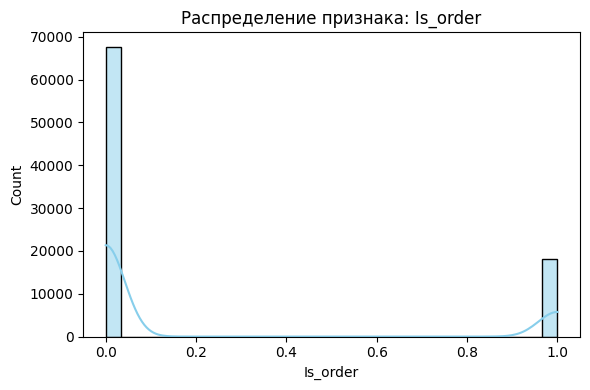

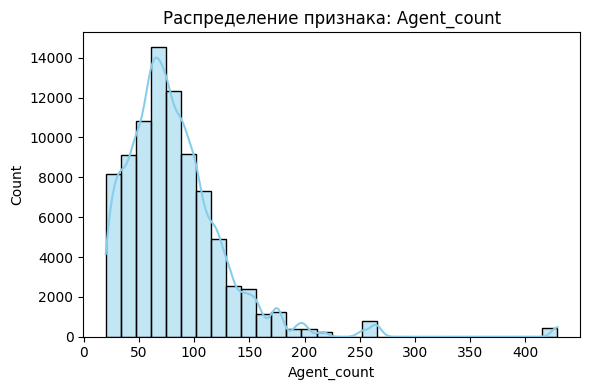

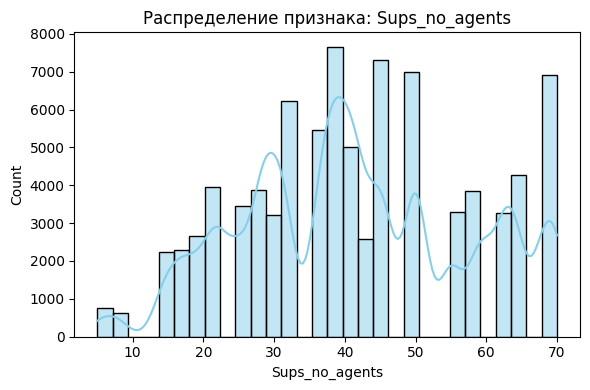

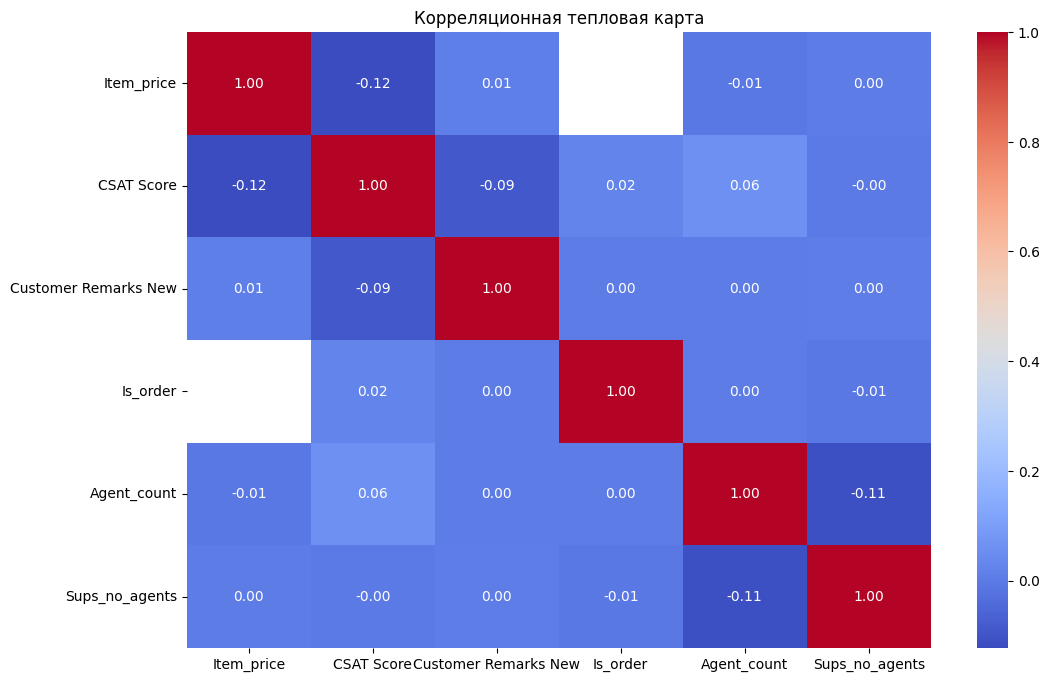

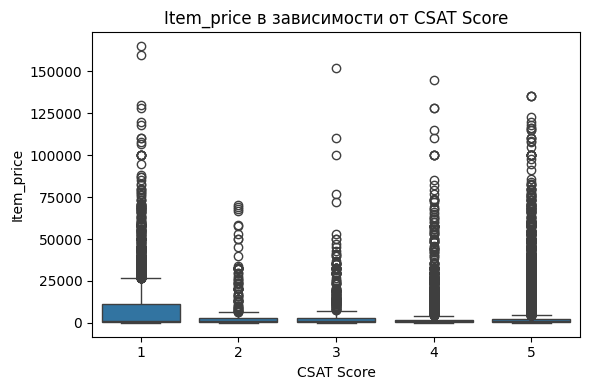

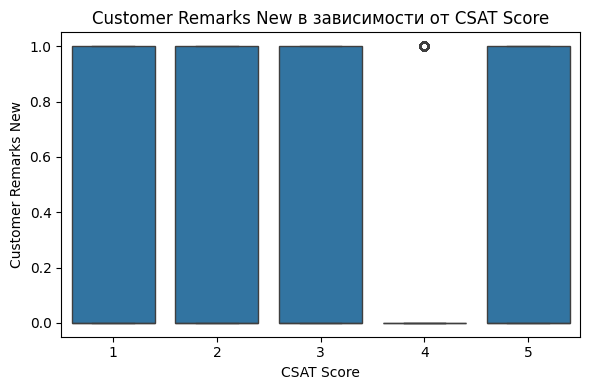

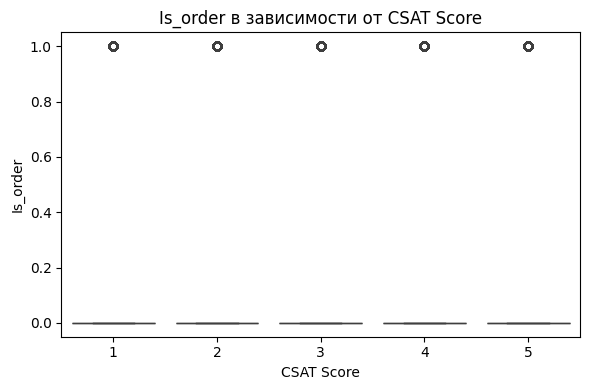

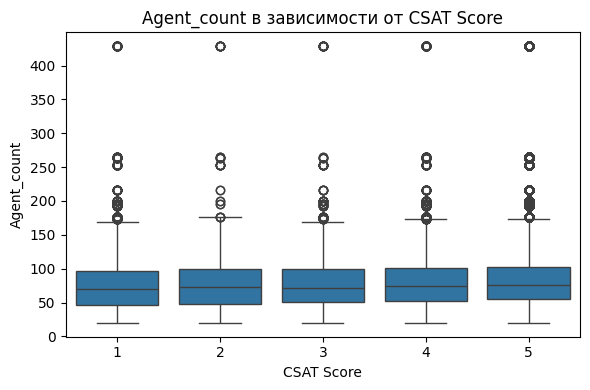

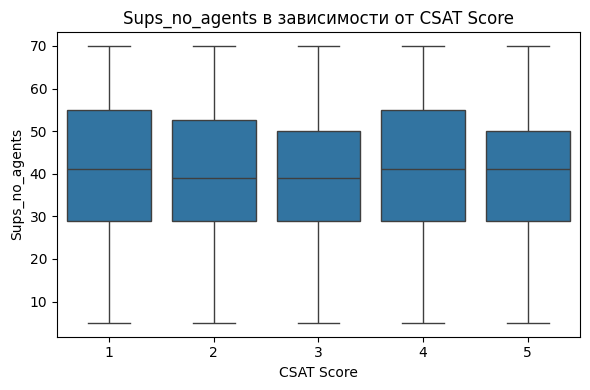

In [ ]:
target = 'CSAT Score'

# 1. Распределение всех числовых признаков
for col in CS_data.select_dtypes(include='number').columns:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.histplot(CS_data[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Распределение признака: {col}')
        plt.tight_layout()
        plt.show()

# 2. Корреляционная тепловая карта
plt.figure(figsize=(12, 8))
corr_matrix = CS_data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная тепловая карта")
plt.show()

# 3. Boxplot: признак против целевой переменной (для оценки распределения внутри групп)
for col in CS_data.select_dtypes(include='number').columns:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=CS_data[target], y=CS_data[col])
        plt.title(f'{col} в зависимости от {target}')
        plt.tight_layout()
        plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.35      0.02      0.03      2241
           2       0.00      0.00      0.00       227
           3       0.00      0.00      0.00       503
           4       0.00      0.00      0.00      2277
           5       0.70      1.00      0.82     11934

    accuracy                           0.69     17182
   macro avg       0.21      0.20      0.17     17182
weighted avg       0.53      0.69      0.57     17182



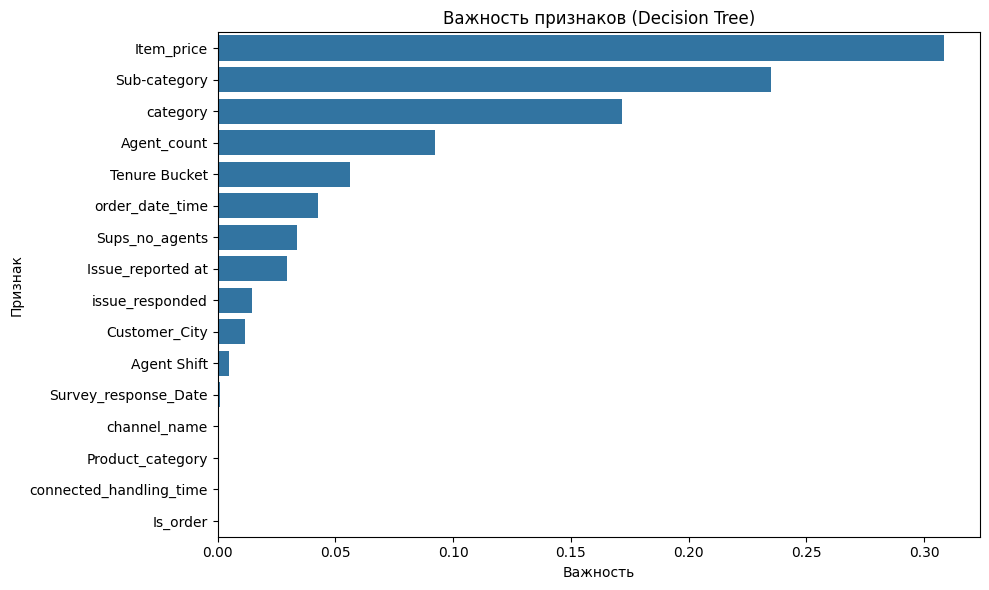

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
# 1. Копия датафрейма, чтобы не портить оригинал
df = CS_data.copy()

# 2. Целевая переменная
target = 'CSAT Score'

# 3. Удаляем ID-поля и явно бесполезные текстовые поля
cols_to_drop = ['Unique id', 'Order_id', 'Customer Remarks', 'Customer Remarks New',
                'Agent_name', 'Supervisor', 'Manager']
df = df.drop(columns=cols_to_drop, errors='ignore')

# 4. Удалим строки с пропущенными значениями в целевой переменной
df = df.dropna(subset=[target])

# 5. Кодируем категориальные признаки
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# 6. Разделение на X и y
X = df.drop(columns=[target])
y = df[target]

# 7. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Модель дерева решений
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# 9. Предсказание и оценка
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# 10. Важность признаков
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Важность признаков (Decision Tree)')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()

Основные статистические данные:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  

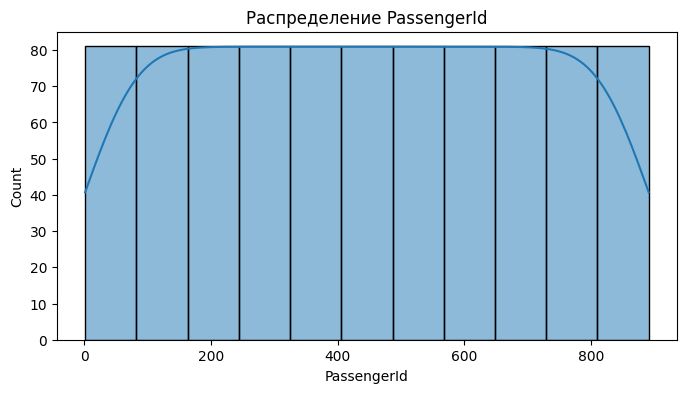

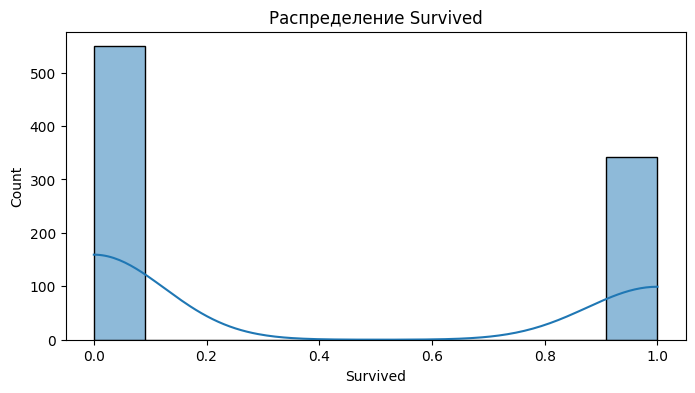

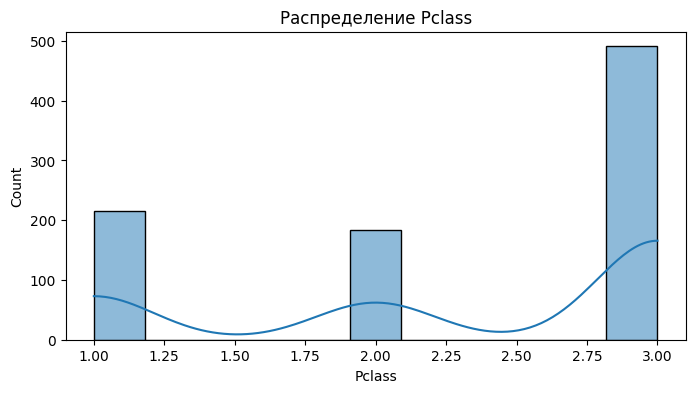

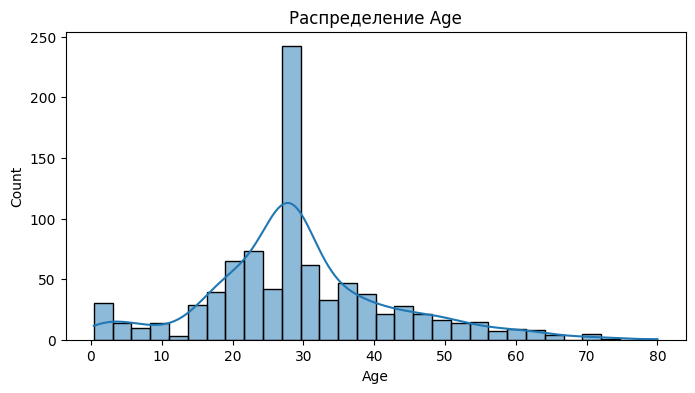

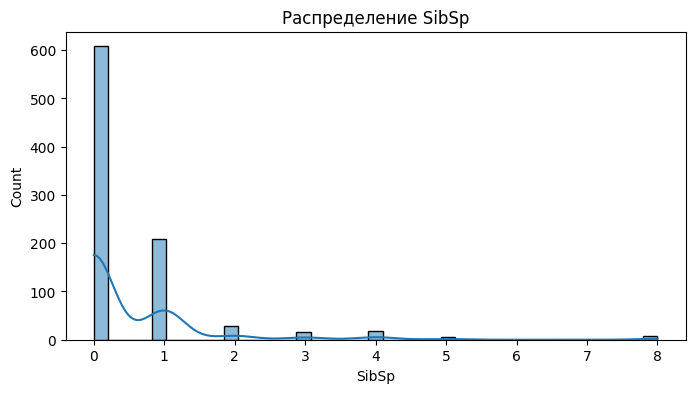

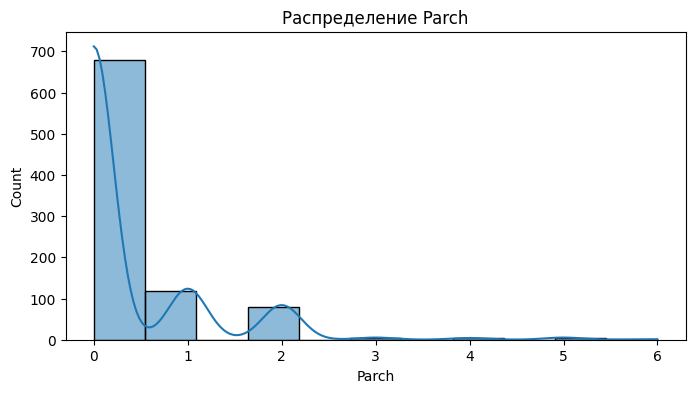

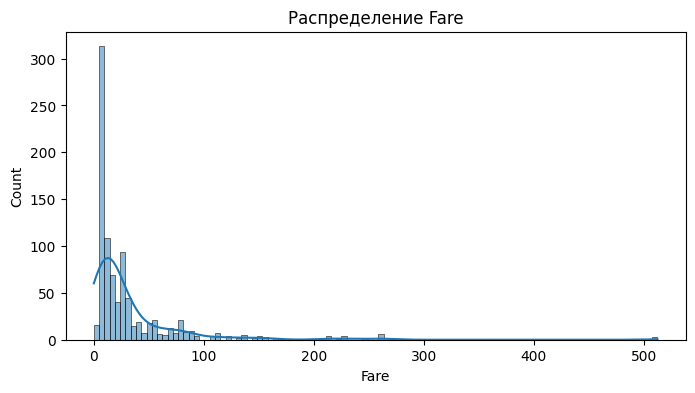

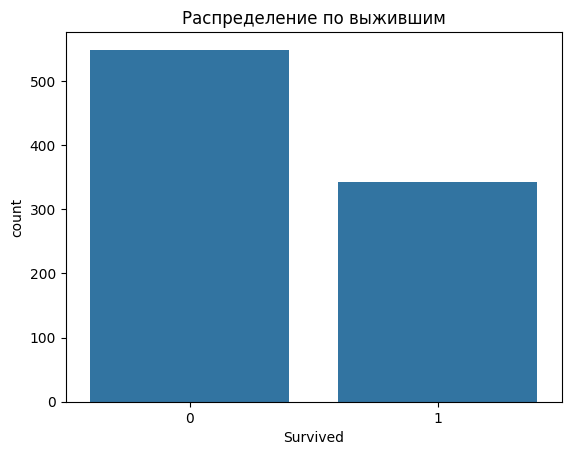

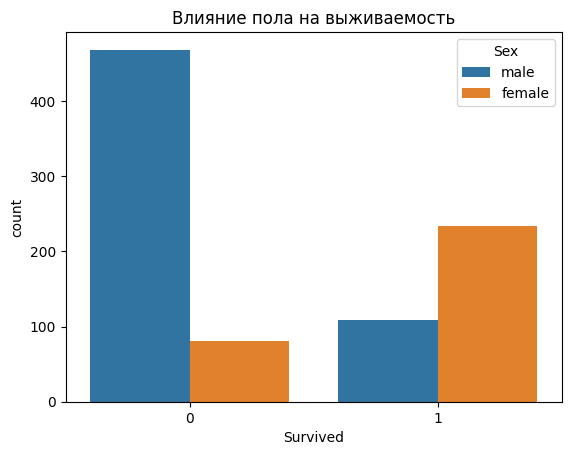

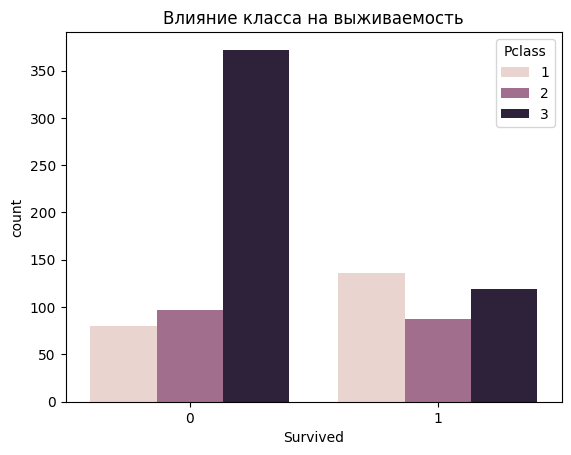

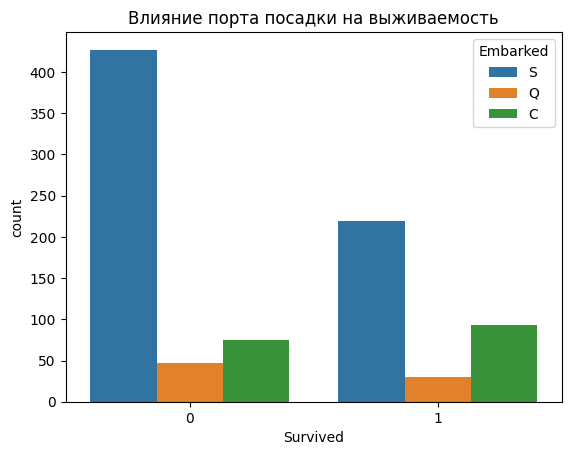

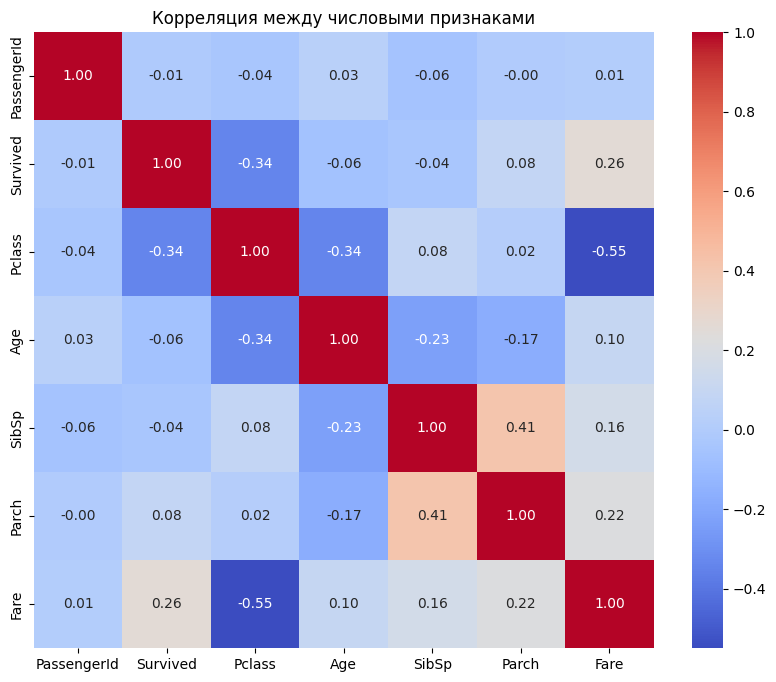


Оценка модели:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



<Figure size 800x600 with 0 Axes>

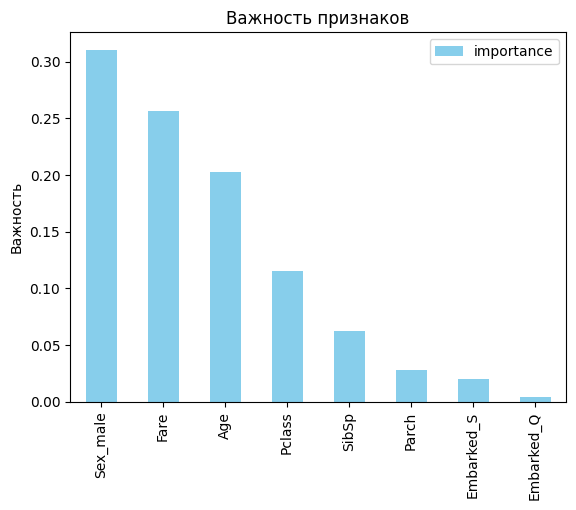

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Загрузка данных
df = pd.read_csv('titanic.csv')

# 1. Основной анализ
print("Основные статистические данные:")
print(df.describe(include='all'))
print("\nТипы данных и пропуски:")
df.info()

# 2. Обработка пропусков
df['Age'] = df['Age'].fillna(df['Age'].median())  # Заполнение пропусков в возрасте медианой
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Заполнение пропусков в порте посадки модой
df = df.dropna(subset=['Survived'])  # Удаляем строки с пропусками в целевой переменной

# 3. Визуализация распределений признаков
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Распределение {col}')
    plt.show()

# 4. Визуализация взаимосвязей признаков
sns.countplot(x='Survived', data=df)
plt.title('Распределение по выжившим')
plt.show()

sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Влияние пола на выживаемость')
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Влияние класса на выживаемость')
plt.show()

sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Влияние порта посадки на выживаемость')
plt.show()

# 5. Корреляция признаков
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между числовыми признаками')
plt.show()

# 6. Моделирование: подготовка данных
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Признаки
y = df['Survived']  # Целевая переменная

# Преобразование категориальных признаков
X = pd.get_dummies(X, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Построение модели дерева решений
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
print("\nОценка модели:")
print(classification_report(y_test, y_pred))

# Важность признаков
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(8, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Важность признаков')
plt.ylabel('Важность')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Загрузка данных
df = pd.read_csv('titanic.csv')

# Предобработка данных
df['Age'] = df['Age'].fillna(df['Age'].median())  # Заполнение пропусков в возрасте медианой
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Заполнение пропусков в порте посадки модой
df = df.dropna(subset=['Survived'])  # Удаляем строки с пропусками в целевой переменной

# Выбор признаков и целевой переменной
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Кодирование категориальных признаков
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])  # Кодируем пол
X['Embarked'] = label_encoder.fit_transform(X['Embarked'])  # Кодируем порт посадки

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель случайного леса
rf = RandomForestClassifier(random_state=42)

# 1. Модель без преобразований
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_basic = accuracy_score(y_test, y_pred)

# 2. С нормализацией
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rf.fit(X_train_scaled, y_train)
y_pred_scaled = rf.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# 3. С иммутированием пропусков
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = X.copy()
X_imputed['Embarked'] = imputer.fit_transform(X_imputed[['Embarked']])
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
rf.fit(X_train_imputed, y_train_imputed)
y_pred_imputed = rf.predict(X_test_imputed)
accuracy_imputed = accuracy_score(y_test_imputed, y_pred_imputed)

# Вывод результатов
print(f'Точность без преобразований: {accuracy_basic:.4f}')
print(f'Точность с нормализацией: {accuracy_scaled:.4f}')
print(f'Точность с иммутированием пропусков: {accuracy_imputed:.4f}')


<ipython-input-57-28a66343f5ad>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = label_encoder.fit_transform(X['Sex'])  # Кодируем пол
<ipython-input-57-28a66343f5ad>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = label_encoder.fit_transform(X['Embarked'])  # Кодируем порт посадки


Точность без преобразований: 0.8212
Точность с нормализацией: 0.8212
Точность с иммутированием пропусков: 0.8212


In [ ]:
# 1. Загрузка датасета
df = pd.read_csv('titanic.csv')

# 2. Удалим ненужные столбцы
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], errors='ignore')

# 3. Заполним пропуски
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# 4. Кодирование категориальных признаков
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# 5. Масштабирование числовых признаков
scaler = StandardScaler()
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# 6. Разделение на X и y
X = df.drop(columns='Survived')
y = df['Survived']

# 7. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Готово: X_train, X_test, y_train, y_test — чистые и готовые к обучению